In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
resultsFolder = 'results/continuous/tests/'
def get_value(filename):

    data = []
    for i in range(3):
        fname = resultsFolder + filename + str(i) + '.csv'
        rw = pd.read_csv(fname).iloc[:,1] # read column 1
        data.append(rw)

    merged = pd.concat(data,axis=1)
    means = np.mean(merged, axis=1)

    upper = np.max(merged, axis=1)
    lower = np.min(merged, axis=1)
    return get_avg(means), get_avg(lower), get_avg(upper)

def get_avg(data):
    rewards = data.tolist()
    avg_reward = [0.] * len(rewards)
    cumulative_rewards = [0.] * len(rewards)
    cumulated_r = 0.
    for i in range(len(rewards)):
        cumulated_r += rewards[i]
        cumulative_rewards[i] = cumulated_r
    for i in range(len(rewards)):
        if i == 0:
            avg_reward[i] = rewards[i]
        else:
            avg_reward[i] = (cumulative_rewards[i] - cumulative_rewards[0])/i
            
    return np.array(avg_reward)

In [87]:
def plotRewards(filename, RL, RLlower, RLupper, IRL, IRLlower, IRLupper):
   
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)

    plt.figure('Collected reward')
    plt.suptitle('Collected reward')

    plt.plot(IRL, label = 'Average reward IRL', linestyle = '--', color =  'r')
    # plt.fill_between(np.arange(len(IRL)), IRLlower, IRLupper, color = 'r', alpha=0.1)
    plt.plot(RL, label = 'Average reward RL', linestyle = '--', color = 'y' )
    plt.fill_between(np.arange(len(RL)), RLlower, RLupper, color = 'y', alpha=0.1)


    plt.legend(loc=4,prop={'size':12})
    plt.xlabel('Episodes')
    plt.ylabel('Avg Reward')

    plt.savefig(resultsFolder + filename + '.png')

    plt.show()

In [85]:
RL, RLlower, RLupper = get_value("rewardsRL")
IRL, IRLlower, IRLupper = get_value("rewardsIRL")

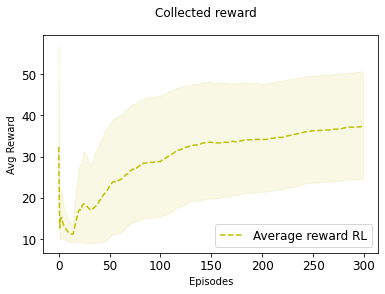

In [79]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

plt.figure('Collected reward')
plt.suptitle('Collected reward')

plt.plot(RL, label = 'Average reward RL', linestyle = '--', color = 'y' )
plt.fill_between(np.arange(len(RL)), RLlower, RLupper, color = 'y', alpha=0.1)

plt.legend(loc=4,prop={'size':12})
plt.xlabel('Episodes')
plt.ylabel('Avg Reward')

plt.show()

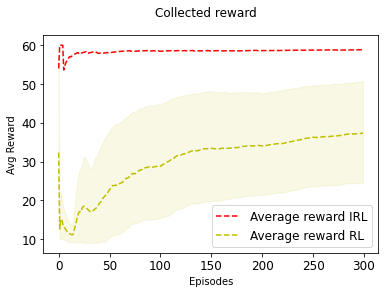

In [88]:
plotRewards("rewards", RL, RLlower, RLupper, IRL, IRLlower, RLupper)